In [1]:
import sqlite3
import pandas as pd


# sqlite connection and df creation

In [2]:
DATABASE = "data/database.sqlite"
SQL_QUERY= "SELECT * FROM {}"
TABLE_LADESAUELE = "Ladesaulen"
TABLE_CARS = "car_registration"

In [3]:
connection = sqlite3.connect(DATABASE)

In [4]:
df_car = pd.read_sql_query(SQL_QUERY.format(TABLE_CARS),connection)
df_charger = pd.read_sql_query(SQL_QUERY.format(TABLE_LADESAUELE),connection)

# Data "Ladesauele" Overview

In [5]:
df_charger.head(5)

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Breitengrad,Längengrad,Inbetriebnahmedatum,...,Art_der_Ladeeinrichung,Anzahl_Ladepunkte,P1__kW_,Public_Key1,P2__kW_,Public_Key2,P3__kW_,Public_Key3,P4__kW_,Public_Key4
0,smopi®,Albstraße,14,None,72535,Heroldstatt,Baden-Württemberg,48.449353,9.672201,23.11.2022,...,Normalladeeinrichtung,4,22,None,22,None,22,None,22,None
1,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,None,72535,Heroldstatt,Baden-Württemberg,48.442398,9.659075,11.01.2020,...,Normalladeeinrichtung,2,22,None,22,None,None,None,None,None
2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,None,72589,Westerheim,Baden-Württemberg,48.510500,9.609000,07.01.2019,...,Normalladeeinrichtung,2,22,None,22,None,None,None,None,None
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,None,73340,Amstetten,Baden-Württemberg,48.578534,9.874840,19.03.2019,...,Schnellladeeinrichtung,2,43,None,50,None,None,None,None,None
4,SWU Energie GmbH,Sterngasse,6,None,88481,Balzheim,Baden-Württemberg,48.179959,10.076977,01.05.2022,...,Normalladeeinrichtung,1,22,None,None,None,None,None,None,None


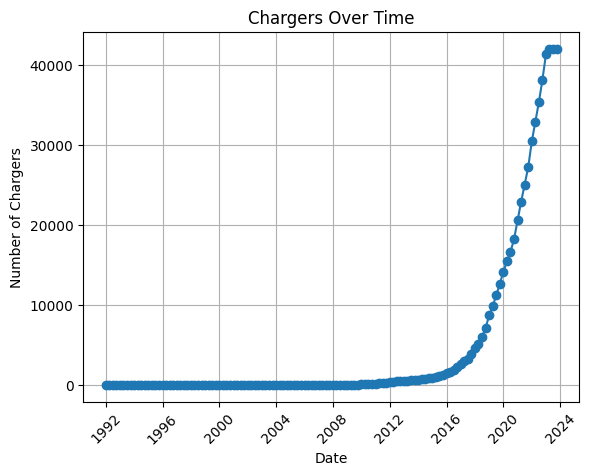

In [7]:
import matplotlib.pyplot as plt
df_charger['Inbetriebnahmedatum'] = pd.to_datetime(df_charger['Inbetriebnahmedatum'], format='%d.%m.%Y')

start_year = df_charger['Inbetriebnahmedatum'].dt.year.min()
end_year = df_charger['Inbetriebnahmedatum'].dt.year.max()

x_dates = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13, 3):
        x_dates.append(pd.Timestamp(year=year, month=month, day=1))

y_counts = []

for date in x_dates:
    count = len(df_charger[df_charger['Inbetriebnahmedatum'] <= date])
    y_counts.append(count)

plt.plot(x_dates, y_counts, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Chargers')
plt.title('Chargers Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Data "KBA Car Registration" Overview 

In [117]:
df_car

,Land,Elektro,Date,Vehicle_Type
0,Baden-Württemberg,1.521,2015,
1,Bayern,2.140,2015,
2,Berlin,279,2015,
3,Brandenburg,110,2015,
4,Bremen,49,2015,
...,...,...,...,...
131,Sachsen,10.663,2022,
132,Sachsen-Anhalt,5.560,2022,
133,Schleswig-Holstein,16.966,2022,
134,Thüringen,6.525,2022,


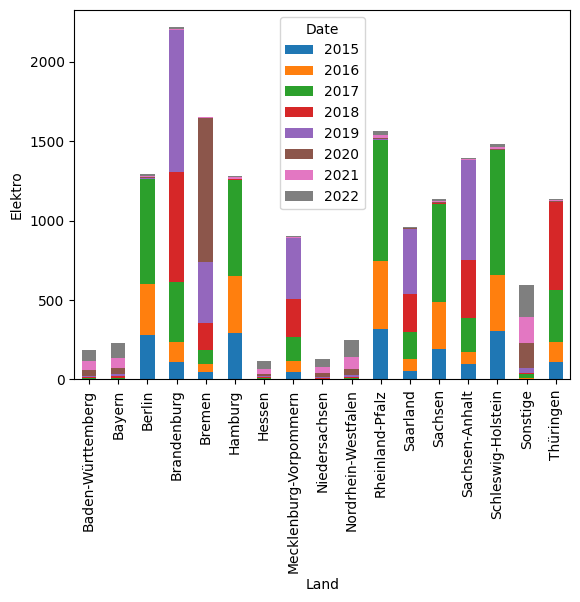

In [97]:
grouped_df = df_car.groupby(['Land', 'Date'])['Elektro'].mean()
grouped_df = grouped_df.reset_index()
pivot_df = grouped_df.pivot(index='Land', columns='Date', values='Elektro')
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Land')
plt.ylabel('Elektro')
plt.show()


In [144]:
elektro

array(['1.521', '2.140', '279', '110', '49', '292', '4.005', '50',
       '1.020', '1.815', '320', '54', '194', '96', '304', '108', '6',
       '2.125', '2.684', '320', '124', '51', '358', '1.511', '65',
       '1.010', '1.814', '424', '74', '293', '76', '352', '128', '1',
       '4.387', '5.677', '664', '381', '86', '608', '3.673', '150',
       '2.229', '4.291', '765', '170', '620', '212', '786', '330', '27',
       '5.806', '8.337', '1.174', '694', '171', '1.126', '4.741', '239',
       '3.031', '6.013', '1.162', '240', '1.065', '367', '1.335', '552',
       '9', '10.223', '14.532', '2.588', '889', '380', '1.395', '4.885',
       '388', '6.347', '12.377', '2.489', '412', '1.298', '630', '2.081',
       '2.339', '28', '32.879', '35.806', '4.951', '3.392', '911',
       '4.138', '15.496', '1.741', '27.027', '39.793', '8.422', '1.936',
       '5.139', '2.211', '7.537', '2.623', '161', '59.165', '66.860',
       '8.737', '6.638', '1.833', '7.334', '33.727', '3.259', '40.084',
       '76

In [160]:
countries = df_car.iloc[:,0].values
elektro = df_car.iloc[:,1].values
date = df_car.iloc[:,2].values

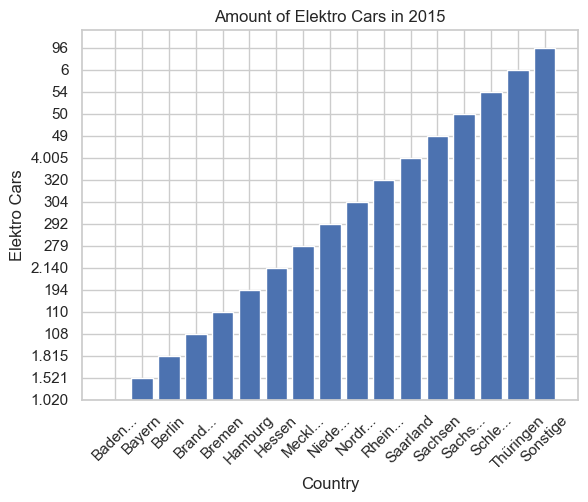

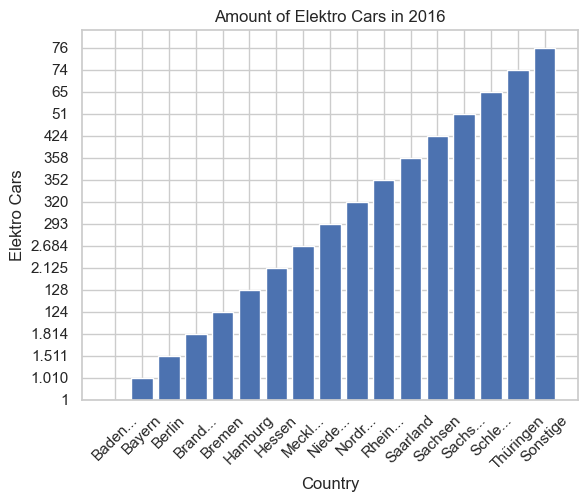

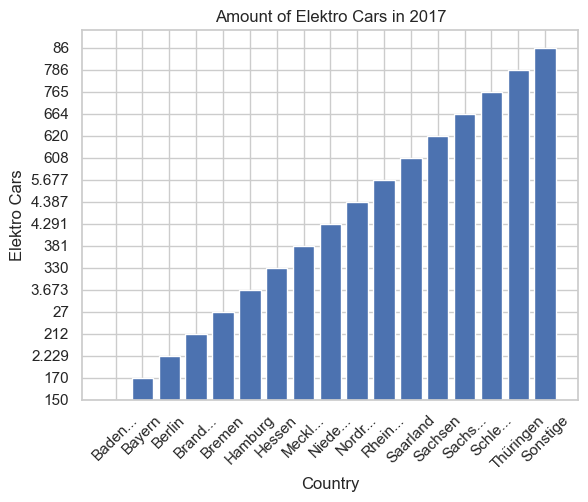

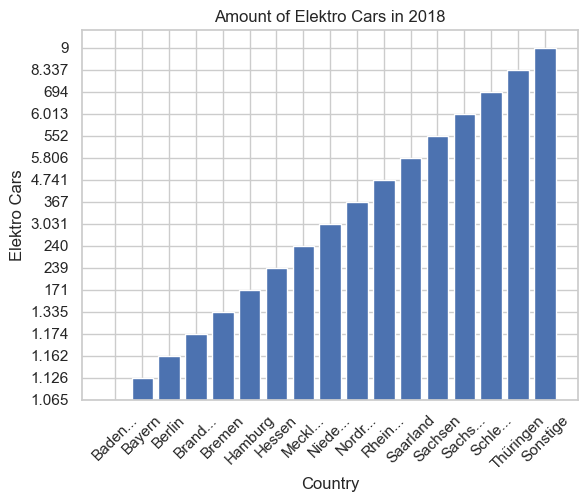

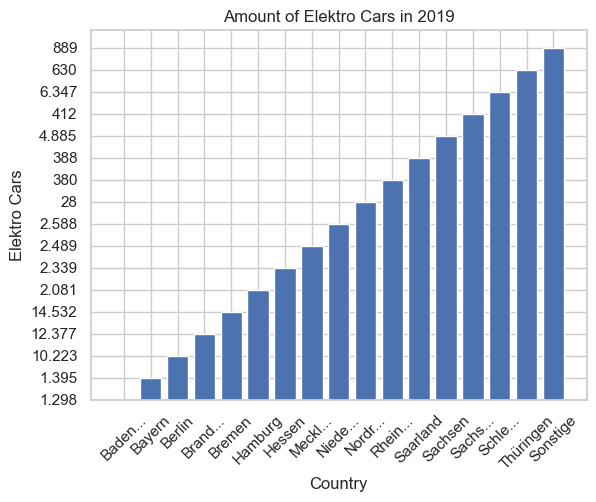

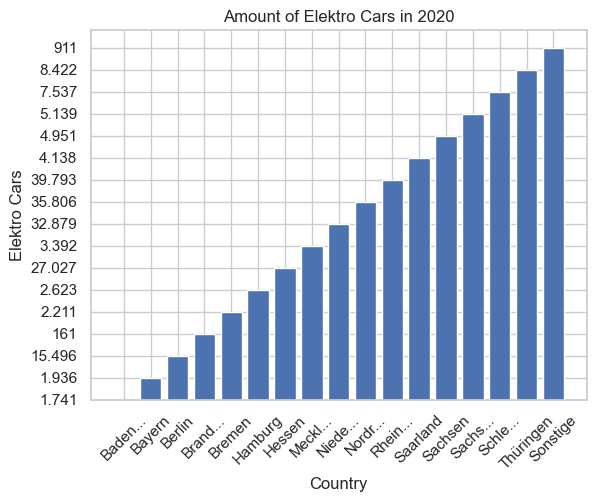

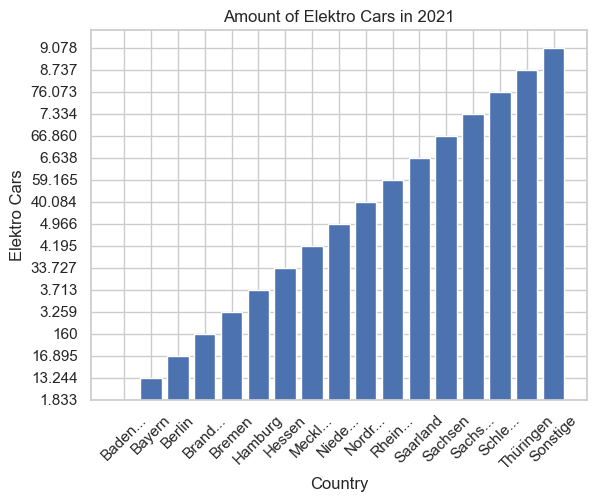

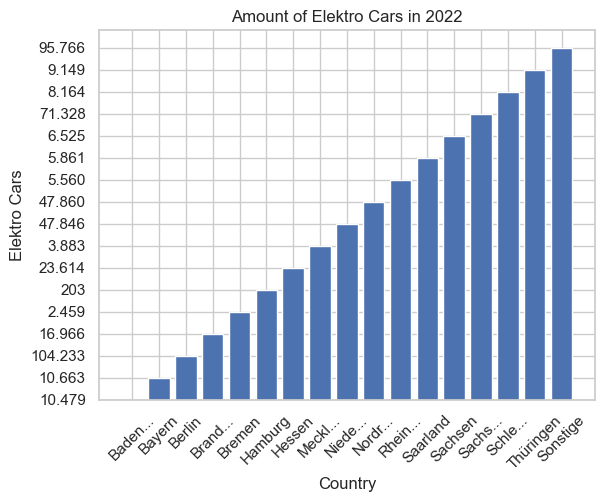

In [161]:
import numpy as np
for i in range(num_groups):
    start_idx = i * 17  # Start index of the group
    end_idx = (i + 1) * 17  # End index of the group
    elektro_part = elektro[start_idx:end_idx]
    country = countries[start_idx:end_idx]
    elektro_part, country = zip(*sorted(zip(elektro_part, country)))
    elektro_part, country = (list(t) for t in zip(*sorted(zip(elektro_part, country))))
    
    plt.figure()  # Create a new figure for each bar chart
    plt.bar(np.arange(17), elektro_part)
    plt.xlabel('Country')
    plt.ylabel('Elektro Cars')
    plt.title(f'Amount of Elektro Cars in {date[start_idx]}')

    country_labels = countries[start_idx:end_idx]
    truncated_labels = [label[:5] + '...' if len(label) > 10 else label for label in country_labels]
    plt.xticks(np.arange(17), truncated_labels, rotation=45)


    

    plt.show()


In [214]:
elektro_part = elektro[0:17]
country = countries[0:17]


In [222]:
combined = list(zip(elektro_part, country))


In [223]:
sorted_list = sorted(combined, key=lambda x: int(float(x[0])))


In [224]:
sorted_list

[('1.020', 'Baden-Württemberg'),
 ('1.521', 'Bayern'),
 ('1.815', 'Berlin'),
 ('2.140', 'Hessen'),
 ('4.005', 'Saarland'),
 ('6', 'Thüringen'),
 ('49', 'Sachsen'),
 ('50', 'Sachsen-Anhalt'),
 ('54', 'Schleswig-Holstein'),
 ('96', 'Sonstige'),
 ('108', 'Brandenburg'),
 ('110', 'Bremen'),
 ('194', 'Hamburg'),
 ('279', 'Mecklenburg-Vorpommern'),
 ('292', 'Niedersachsen'),
 ('304', 'Nordrhein-Westfalen'),
 ('320', 'Rheinland-Pfalz')]

In [202]:
sorted_list = [combined[i] for i in sorted_indices]


In [203]:
sorted_list

[('1.020', 'Baden-Württemberg'),
 ('1.521', 'Bayern'),
 ('1.815', 'Berlin'),
 ('108', 'Brandenburg'),
 ('110', 'Bremen'),
 ('194', 'Hamburg'),
 ('2.140', 'Hessen'),
 ('279', 'Mecklenburg-Vorpommern'),
 ('292', 'Niedersachsen'),
 ('304', 'Nordrhein-Westfalen'),
 ('320', 'Rheinland-Pfalz'),
 ('4.005', 'Saarland'),
 ('49', 'Sachsen'),
 ('50', 'Sachsen-Anhalt'),
 ('54', 'Schleswig-Holstein'),
 ('6', 'Thüringen'),
 ('96', 'Sonstige')]